### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

### Loading the Data


In [2]:
data = pd.read_csv('../Data/data.csv')

In [3]:
data = data [["Brand","Model","Year of Manufacture","Condition","Transmission","Fuel type","Vehicle_Price"]]

## Clean the 'Vehicle_Price' column
data['Vehicle_Price'] = data['Vehicle_Price'].replace({'Rs': '', ',': ''}, regex=True)
data['Vehicle_Price'] = pd.to_numeric(data['Vehicle_Price'], errors='coerce') 
data = data[data["Year of Manufacture"]>=2000] 
data = data[data["Vehicle_Price"]>=1300000]

In [4]:
data

Brand  Model  Year of Manufacture Condition Transmission Fuel type  \
0     Honda    CRV                 2017      Used    Tiptronic    Petrol   
1     Honda    CRV                 2018      Used    Tiptronic    Petrol   
2     Honda  Vezel                 2024      Used    Tiptronic    Hybrid   
3     Honda  Vezel                 2018      Used    Tiptronic    Hybrid   
4     Honda  Grace                 2016      Used    Tiptronic    Hybrid   
...     ...    ...                  ...       ...          ...       ...   
2790    BMW  740Le                 2016      Used    Automatic    Petrol   
2791    BMW   740e                 2017      Used    Automatic    Petrol   
2792    BMW   318i                 2016      Used    Automatic    Petrol   
2793    BMW   318i                 2019      Used    Automatic    Petrol   
2794    BMW     X2                 2018      Used    Automatic    Petrol   

      Vehicle_Price  
0        19250000.0  
1        22500000.0  
2        22900000.0  
3        14500000.0  
4        11250000.0  
...             ...  
2790     45500000.0  
2791     50000000.0  
2792     21000000.0  
2793     26590000.0  
2794     22000000.0  

[2163 rows x 7 columns]

In [5]:
# getting the median
grouped_df = data.groupby(
    ['Brand', 'Model', 'Year of Manufacture', 'Transmission', 'Fuel type']
).agg(
    Count=('Vehicle_Price', 'count'),
    Median_Price=('Vehicle_Price', 'median'),
).reset_index()

grouped_df = grouped_df[grouped_df["Median_Price"]>=1500000]

# getting the min and max yom of each partition
grouped_df_yom= grouped_df.groupby(
    ['Brand', 'Model','Transmission', 'Fuel type']
).agg(
    Min_Year=('Year of Manufacture', 'min'),
    Max_Year=('Year of Manufacture', 'max')
).reset_index()

df_combined = grouped_df_yom.merge(
    grouped_df,
    on=['Brand', 'Model', 'Transmission', 'Fuel type'],
    how='left'
)

In [6]:
grouped_df

Brand  Model  Year of Manufacture Transmission Fuel type  Count  \
0       BMW  225XE                 2016    Automatic    Petrol      1   
1       BMW   318i                 2008    Automatic    Petrol      1   
2       BMW   318i                 2016    Automatic    Petrol      1   
3       BMW   318i                 2017    Automatic    Petrol      1   
4       BMW   318i                 2018    Automatic    Petrol      2   
..      ...    ...                  ...          ...       ...    ...   
875  Toyota  Yaris                 2024    Automatic    Hybrid      5   
876  Toyota  Yaris                 2024    Automatic    Petrol     10   
877  Toyota  Yaris                 2025    Automatic    Hybrid     11   
878  Toyota  Yaris                 2025    Automatic    Petrol     10   
879  Toyota  Yaris                 2025    Tiptronic    Hybrid      3   

     Median_Price  
0      18500000.0  
1      13000000.0  
2      21000000.0  
3      21500000.0  
4      24625000.0  
..            ...  
875    16550000.0  
876    11370000.0  
877    19000000.0  
878    18150000.0  
879    20000000.0  

[878 rows x 7 columns]

In [7]:
grouped_df_yom

Brand  Model Transmission Fuel type  Min_Year  Max_Year
0       BMW  225XE    Automatic    Petrol      2016      2016
1       BMW   318i    Automatic    Petrol      2008      2019
2       BMW   320i    Automatic    Petrol      2011      2011
3       BMW   528i    Automatic    Petrol      2011      2011
4       BMW   530e    Automatic    Petrol      2017      2017
..      ...    ...          ...       ...       ...       ...
298  Toyota   Wish    Automatic    Petrol      2014      2014
299  Toyota  Yaris    Automatic    Hybrid      2022      2025
300  Toyota  Yaris    Automatic    Petrol      2007      2025
301  Toyota  Yaris    Tiptronic    Hybrid      2025      2025
302  Toyota  Yaris    Tiptronic    Petrol      2023      2023

[303 rows x 6 columns]

In [8]:
df_combined

Brand  Model Transmission Fuel type  Min_Year  Max_Year  \
0       BMW  225XE    Automatic    Petrol      2016      2016   
1       BMW   318i    Automatic    Petrol      2008      2019   
2       BMW   318i    Automatic    Petrol      2008      2019   
3       BMW   318i    Automatic    Petrol      2008      2019   
4       BMW   318i    Automatic    Petrol      2008      2019   
..      ...    ...          ...       ...       ...       ...   
873  Toyota  Yaris    Automatic    Petrol      2007      2025   
874  Toyota  Yaris    Automatic    Petrol      2007      2025   
875  Toyota  Yaris    Automatic    Petrol      2007      2025   
876  Toyota  Yaris    Tiptronic    Hybrid      2025      2025   
877  Toyota  Yaris    Tiptronic    Petrol      2023      2023   

     Year of Manufacture  Count  Median_Price  
0                   2016      1    18500000.0  
1                   2008      1    13000000.0  
2                   2016      1    21000000.0  
3                   2017      1    21500000.0  
4                   2018      2    24625000.0  
..                   ...    ...           ...  
873                 2023     24    10800000.0  
874                 2024     10    11370000.0  
875                 2025     10    18150000.0  
876                 2025      3    20000000.0  
877                 2023      1    10450000.0  

[878 rows x 9 columns]

In [9]:
# First, group to get min and max year per partition
year_range_df = df_combined.groupby(
    ['Brand', 'Model', 'Transmission', 'Fuel type']
).agg(
    Min_Year=('Year of Manufacture', 'min'),
    Max_Year=('Year of Manufacture', 'max')
).reset_index()

# Now, expand each row into multiple rows with years from Min_Year to Max_Year
expanded_rows = []

for _, row in year_range_df.iterrows():
    for year in range(row['Min_Year'], row['Max_Year'] + 1):
        expanded_rows.append({
            'Brand': row['Brand'],
            'Model': row['Model'],
            'Transmission': row['Transmission'],
            'Fuel type': row['Fuel type'],
            'Year of Manufacture': year
        })

# Create final DataFrame
expanded_year_df = pd.DataFrame(expanded_rows)

In [10]:
expanded_year_df

Brand  Model Transmission Fuel type  Year of Manufacture
0        BMW  225XE    Automatic    Petrol                 2016
1        BMW   318i    Automatic    Petrol                 2008
2        BMW   318i    Automatic    Petrol                 2009
3        BMW   318i    Automatic    Petrol                 2010
4        BMW   318i    Automatic    Petrol                 2011
...      ...    ...          ...       ...                  ...
1645  Toyota  Yaris    Automatic    Petrol                 2023
1646  Toyota  Yaris    Automatic    Petrol                 2024
1647  Toyota  Yaris    Automatic    Petrol                 2025
1648  Toyota  Yaris    Tiptronic    Hybrid                 2025
1649  Toyota  Yaris    Tiptronic    Petrol                 2023

[1650 rows x 5 columns]

In [11]:
### creating the master table with joing the both two tables
master_table = expanded_year_df.merge(
    df_combined,
    on=["Brand", "Model", "Transmission", "Fuel type", "Year of Manufacture"],
    how="left"
)

In [12]:
master_table

Brand  Model Transmission Fuel type  Year of Manufacture  Min_Year  \
0        BMW  225XE    Automatic    Petrol                 2016    2016.0   
1        BMW   318i    Automatic    Petrol                 2008    2008.0   
2        BMW   318i    Automatic    Petrol                 2009       NaN   
3        BMW   318i    Automatic    Petrol                 2010       NaN   
4        BMW   318i    Automatic    Petrol                 2011       NaN   
...      ...    ...          ...       ...                  ...       ...   
1645  Toyota  Yaris    Automatic    Petrol                 2023    2007.0   
1646  Toyota  Yaris    Automatic    Petrol                 2024    2007.0   
1647  Toyota  Yaris    Automatic    Petrol                 2025    2007.0   
1648  Toyota  Yaris    Tiptronic    Hybrid                 2025    2025.0   
1649  Toyota  Yaris    Tiptronic    Petrol                 2023    2023.0   

      Max_Year  Count  Median_Price  
0       2016.0    1.0    18500000.0  
1       2019.0    1.0    13000000.0  
2          NaN    NaN           NaN  
3          NaN    NaN           NaN  
4          NaN    NaN           NaN  
...        ...    ...           ...  
1645    2025.0   24.0    10800000.0  
1646    2025.0   10.0    11370000.0  
1647    2025.0   10.0    18150000.0  
1648    2025.0    3.0    20000000.0  
1649    2023.0    1.0    10450000.0  

[1650 rows x 9 columns]

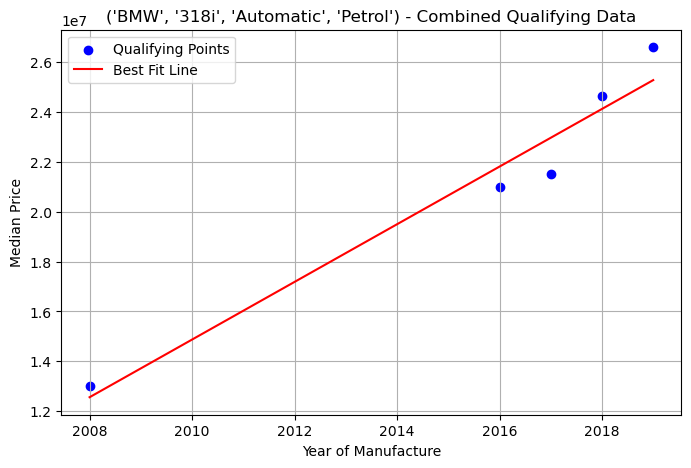

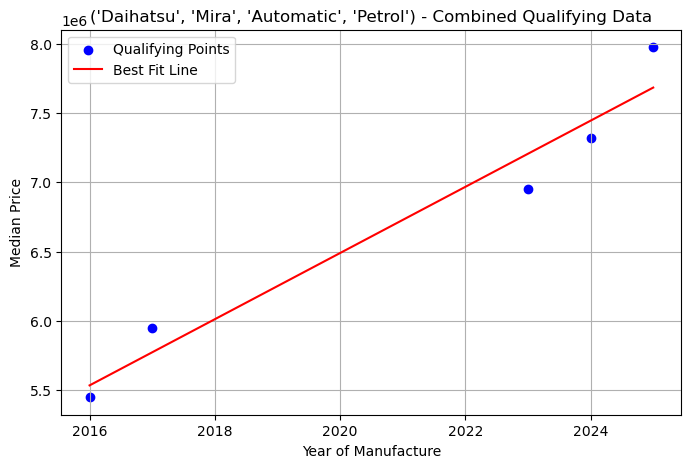

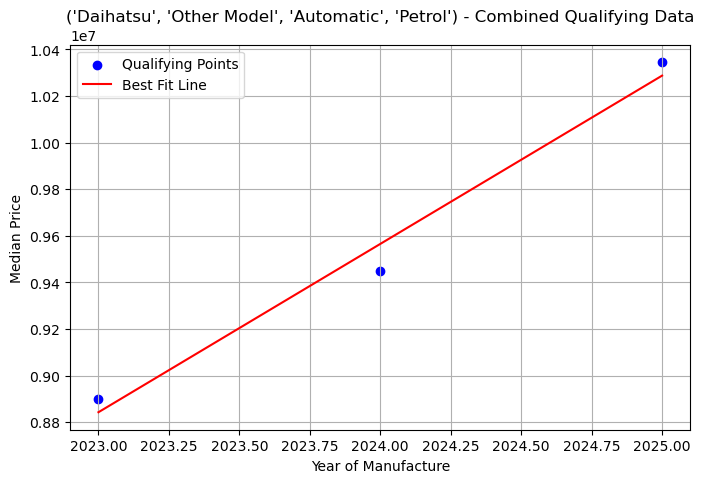

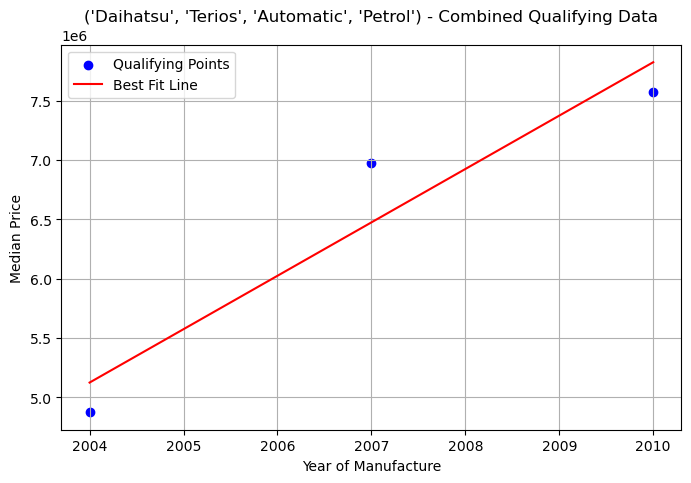

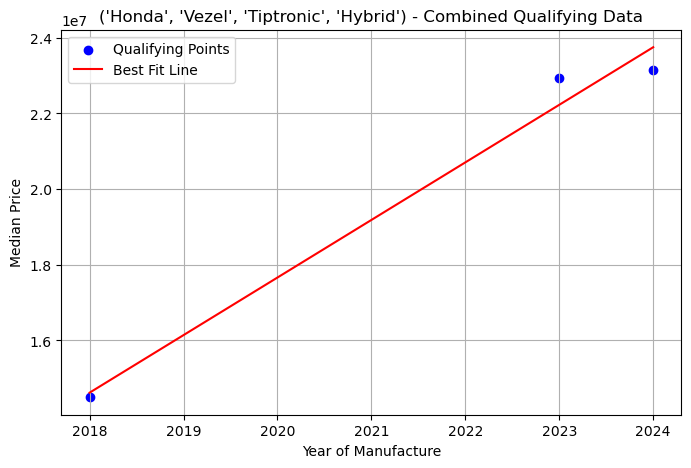

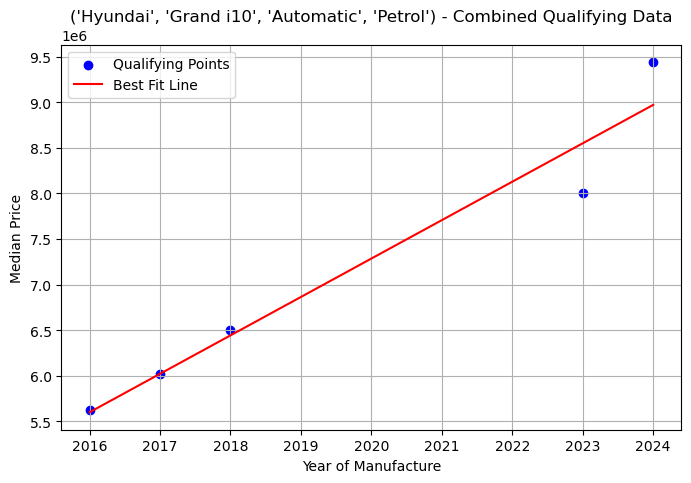

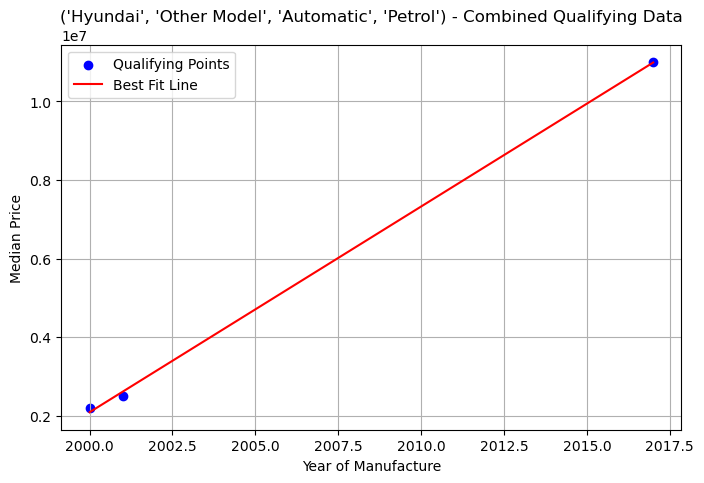

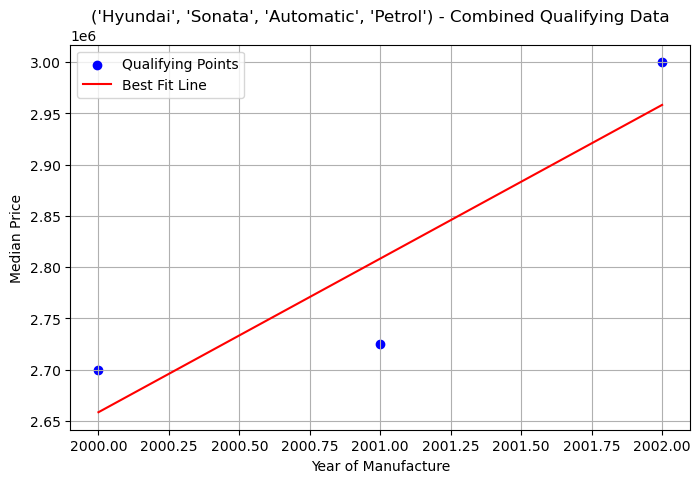

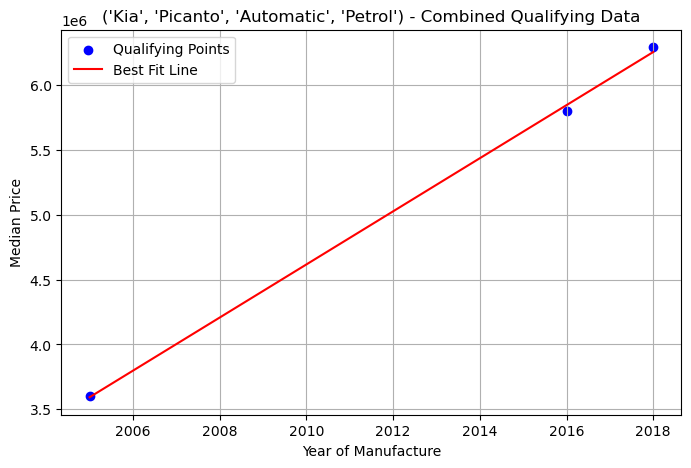

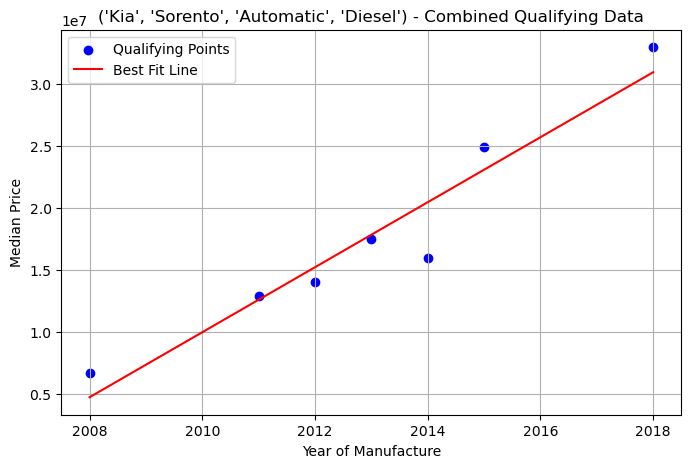

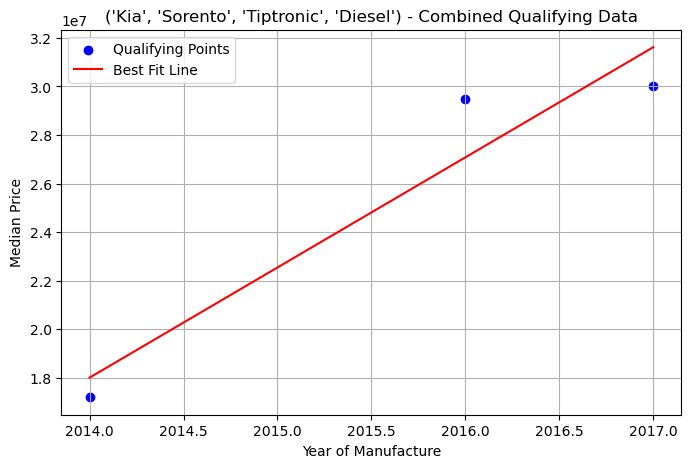

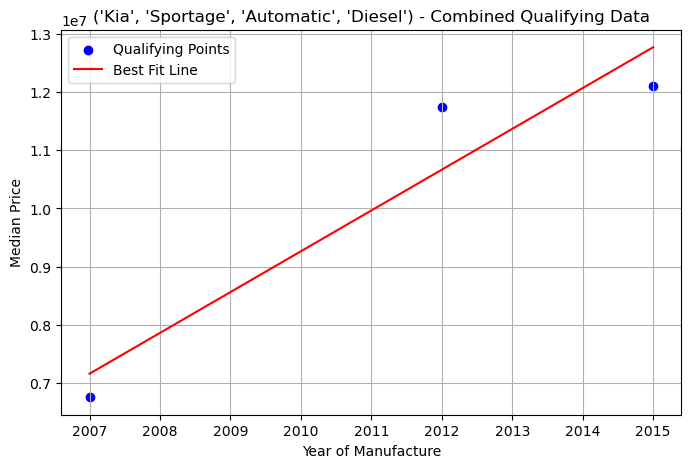

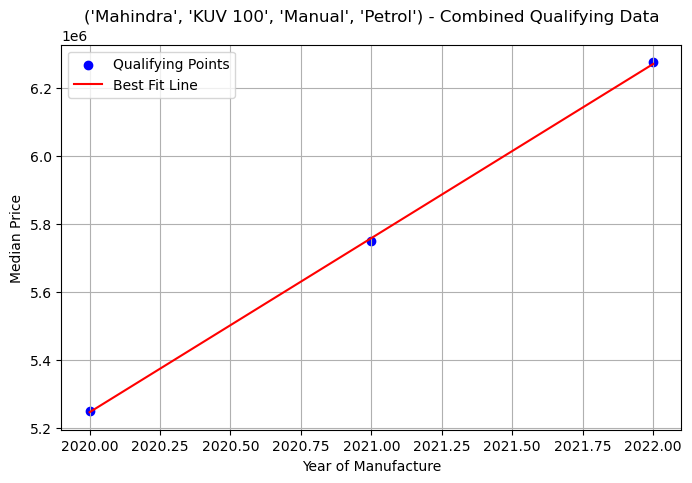

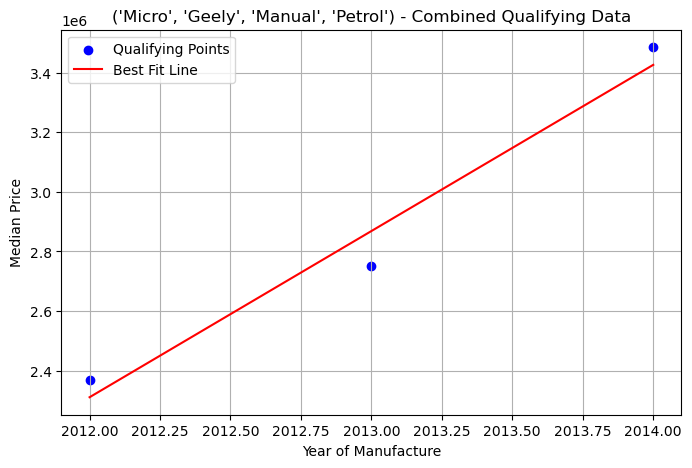

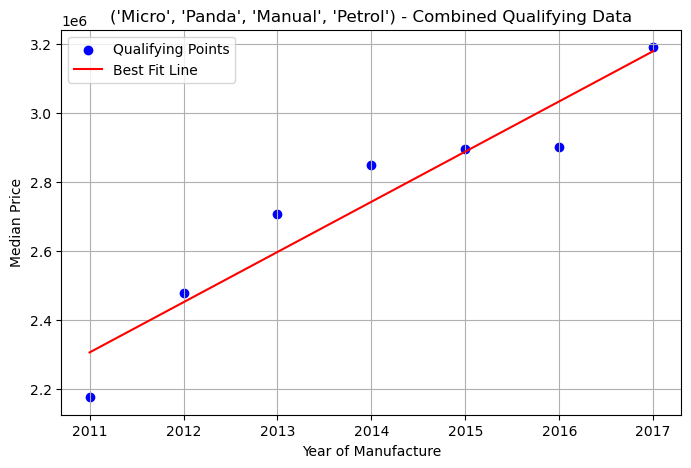

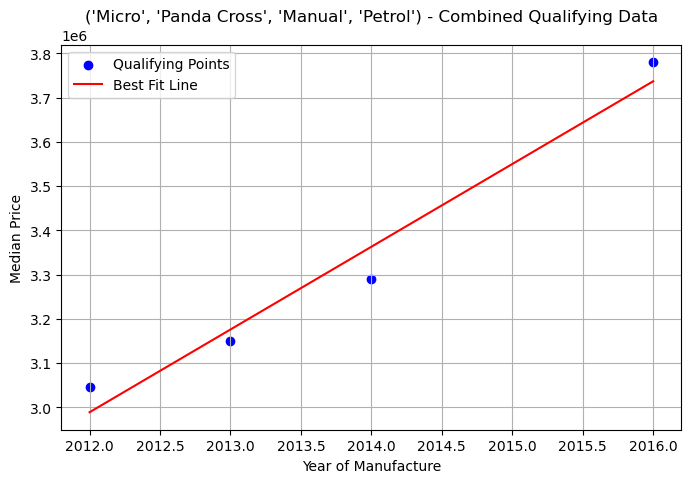

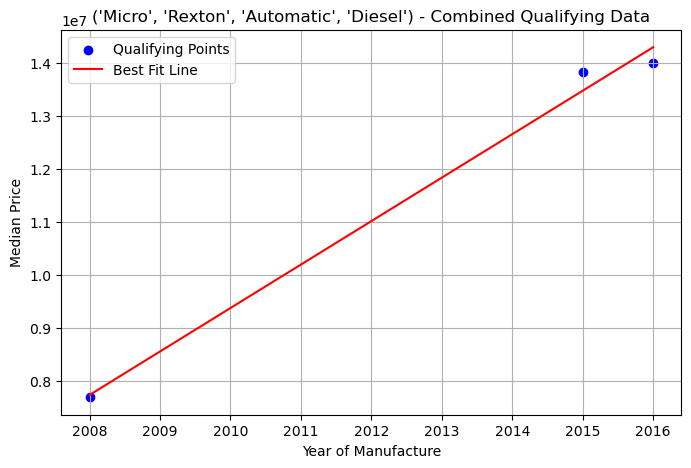

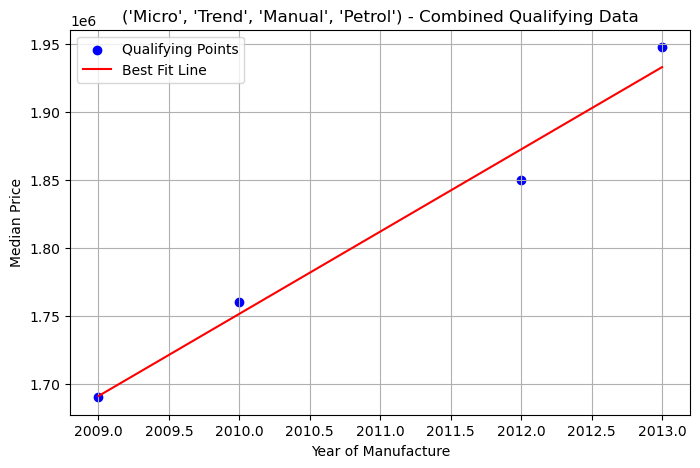

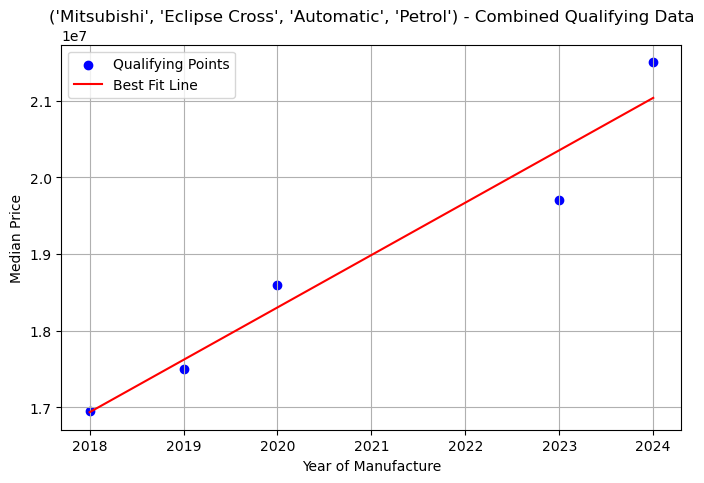

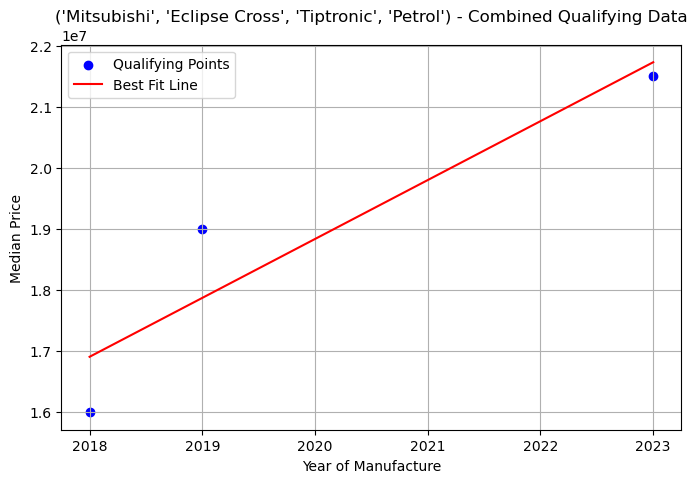

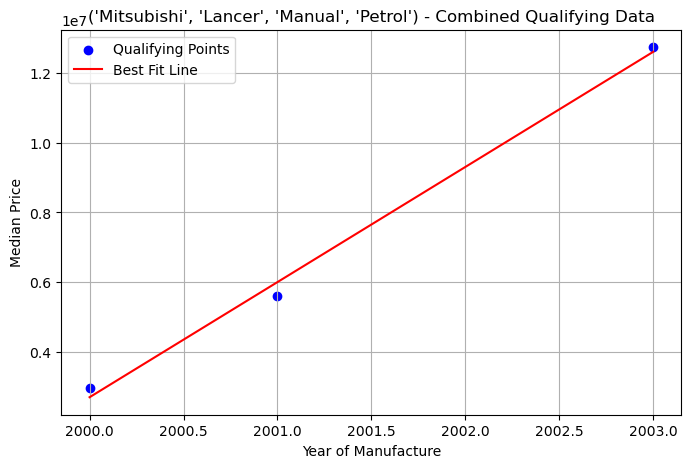

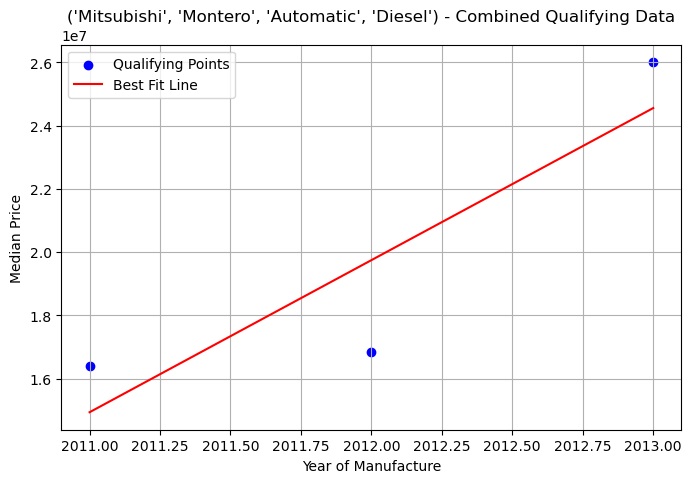

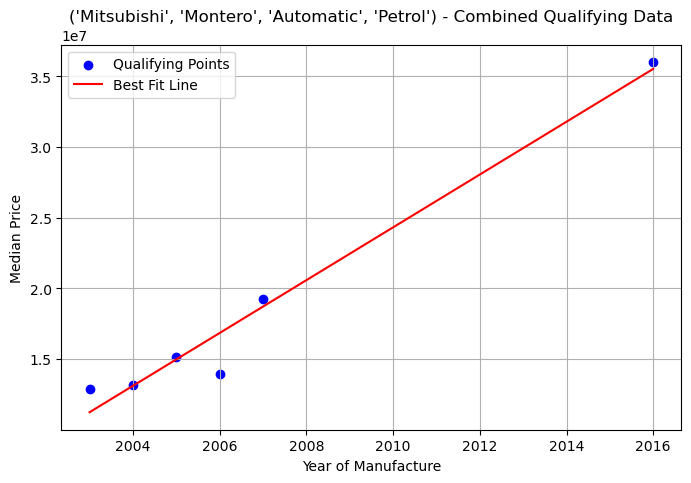

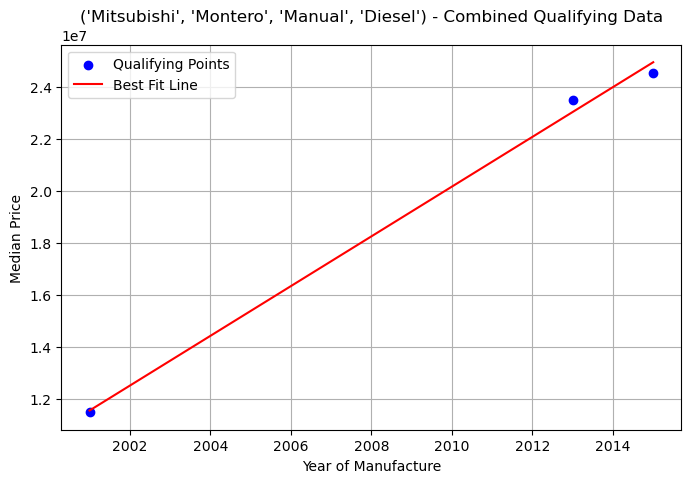

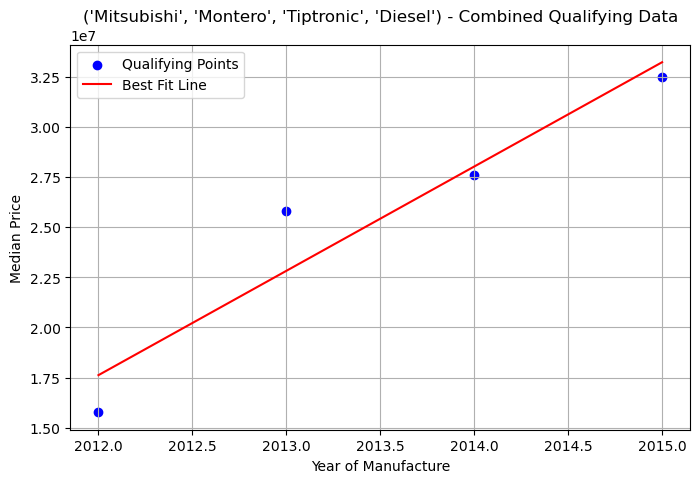

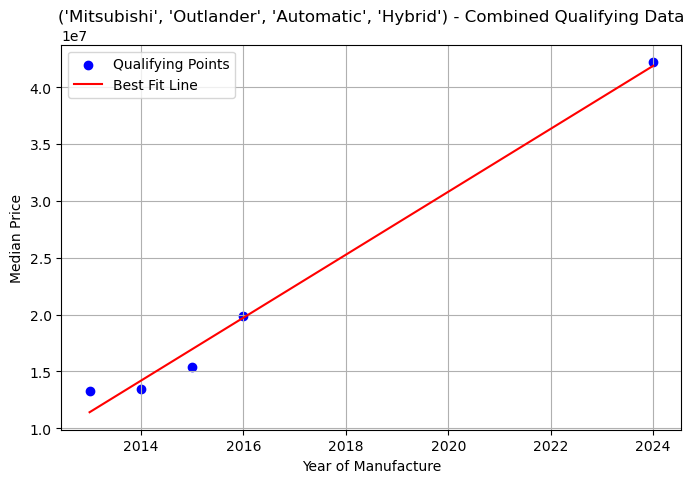

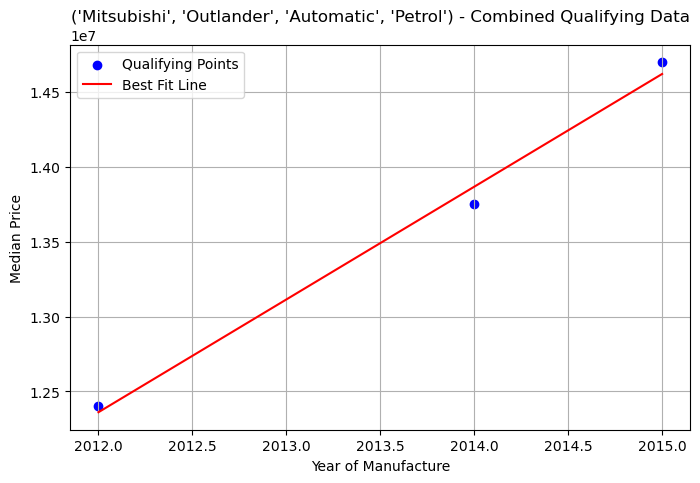

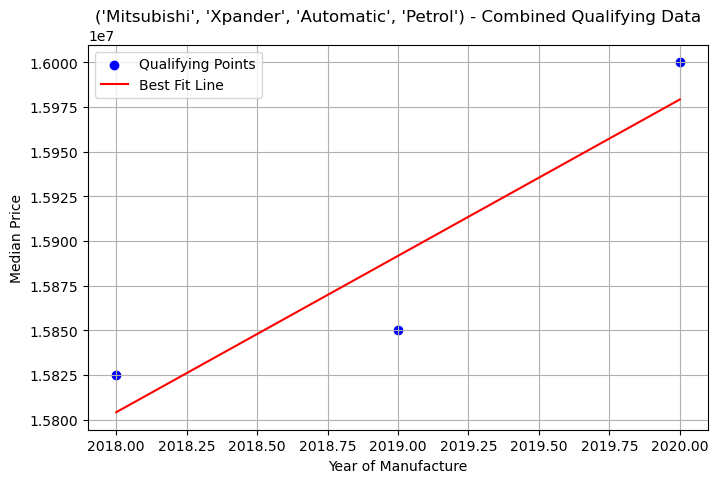

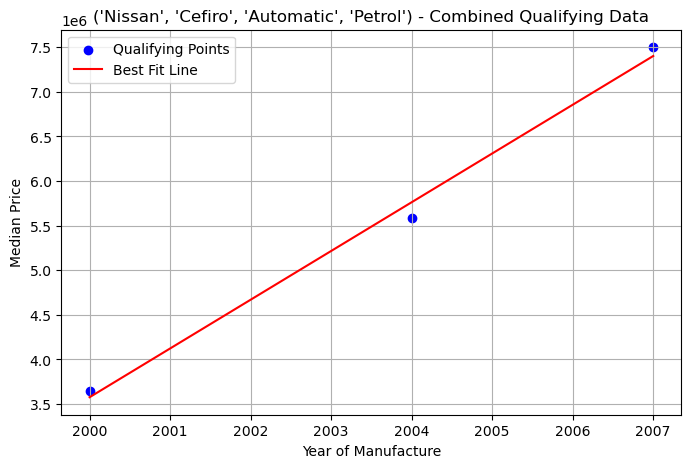

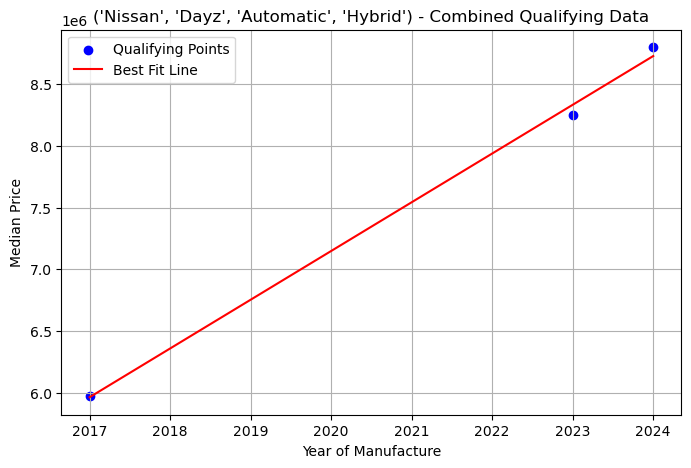

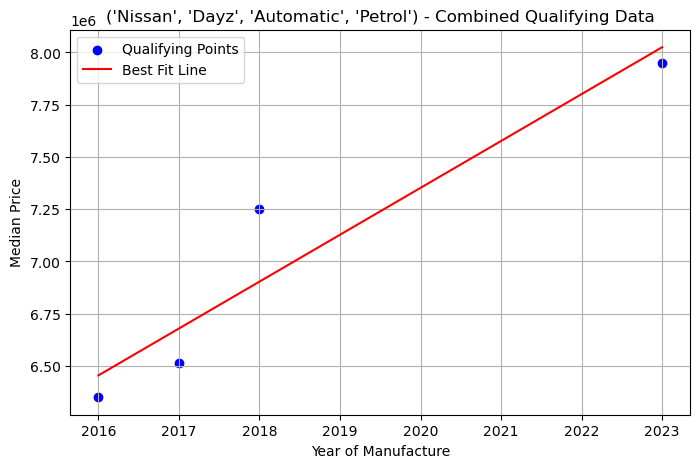

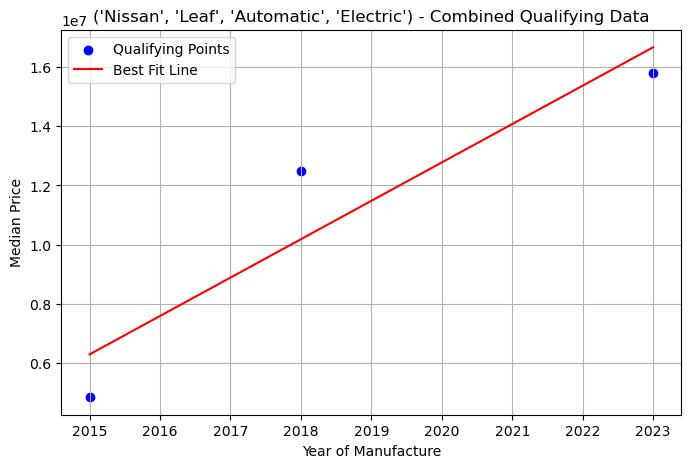

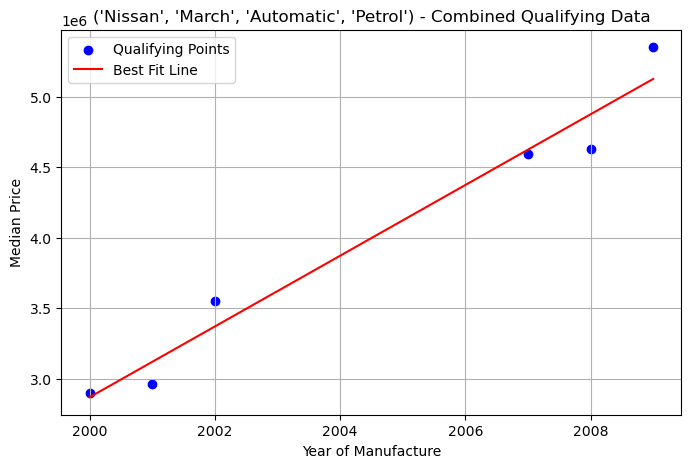

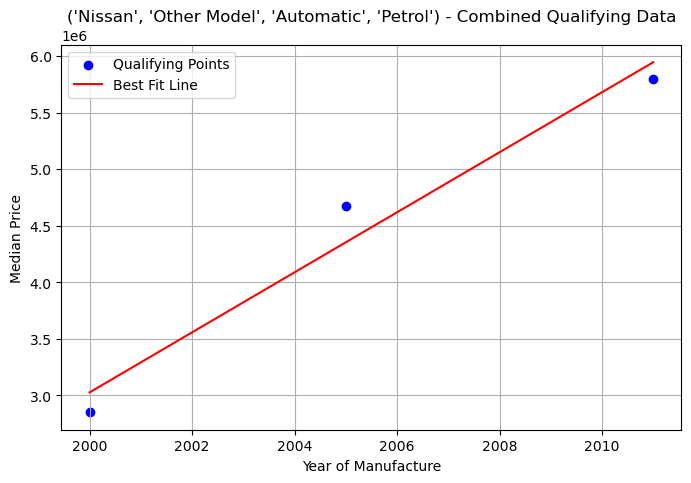

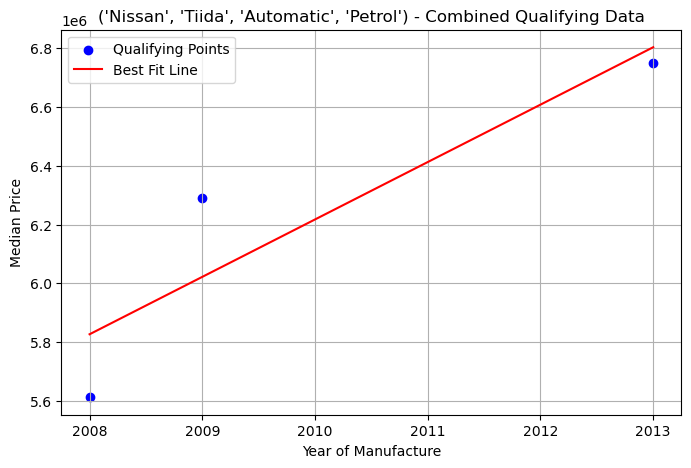

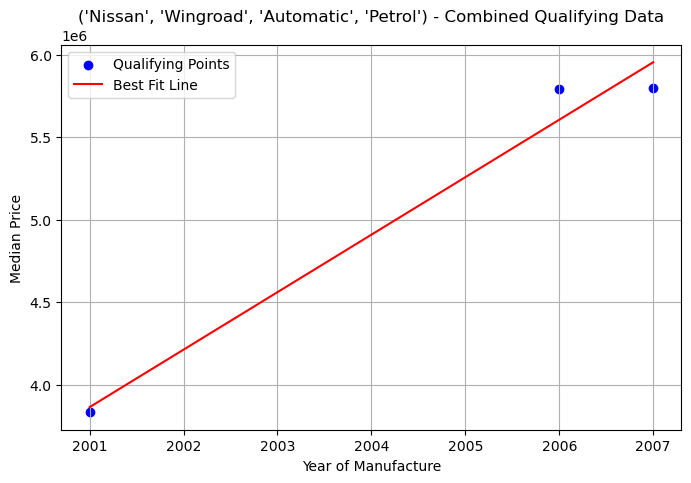

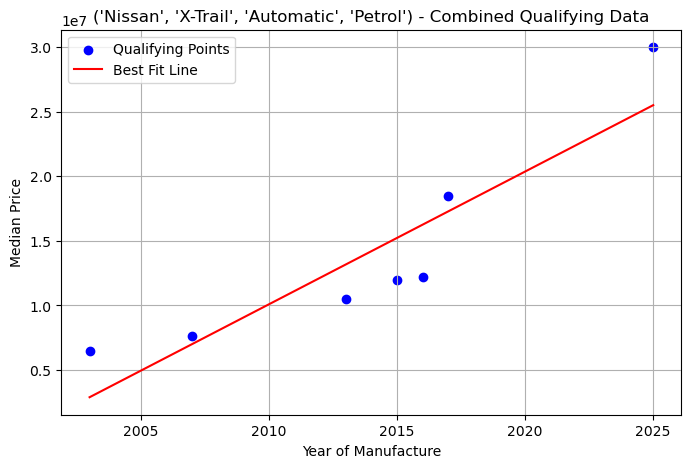

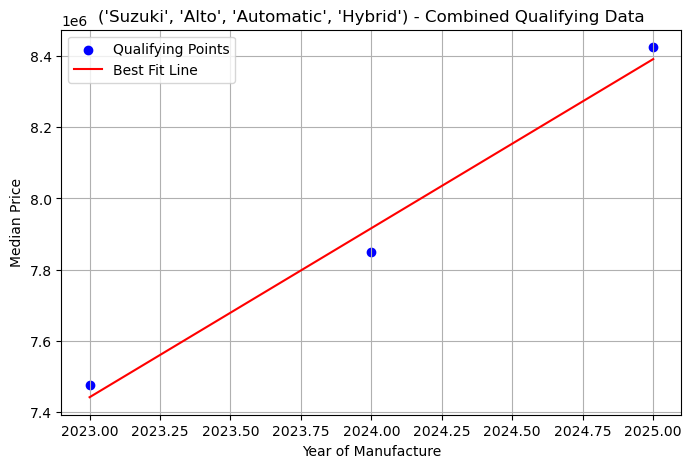

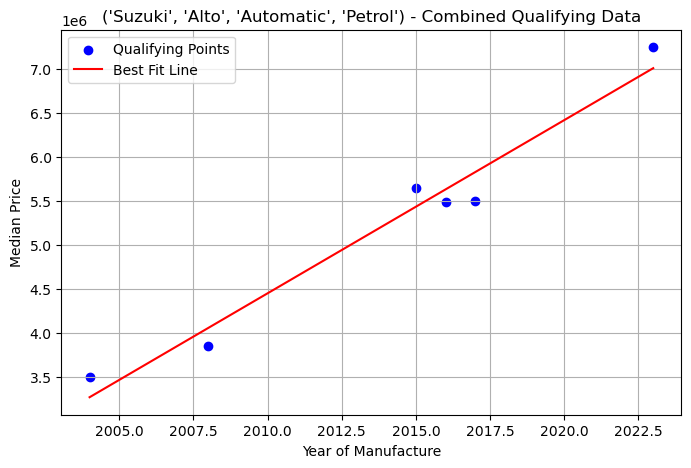

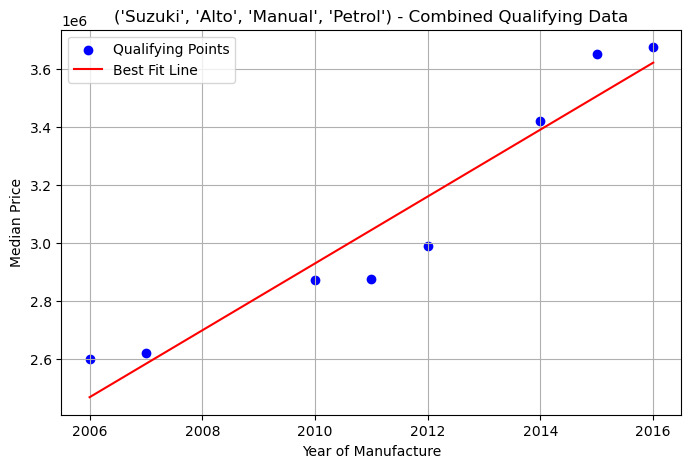

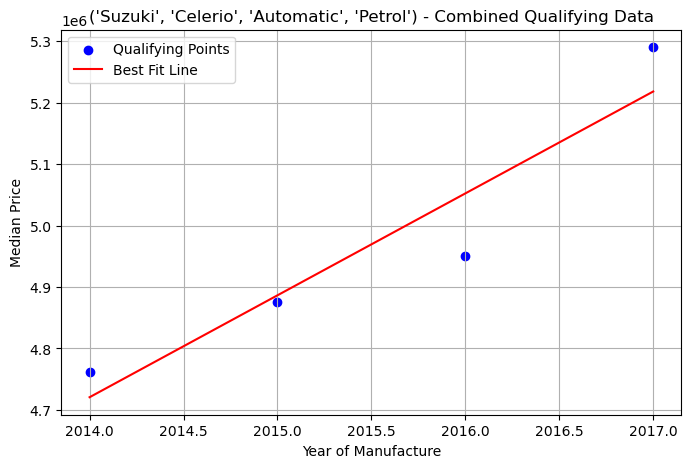

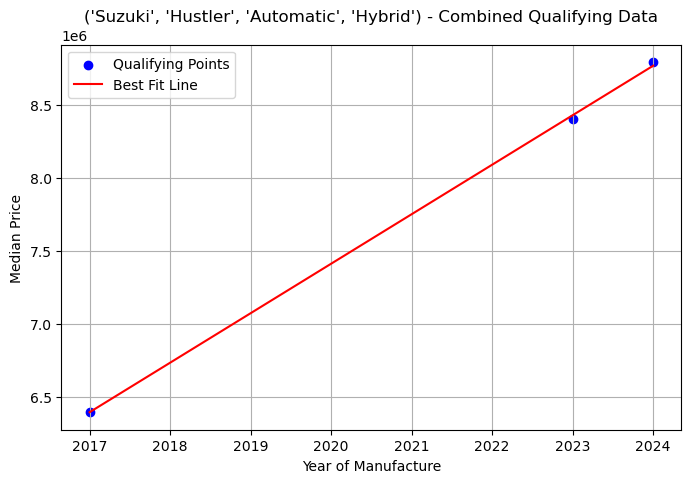

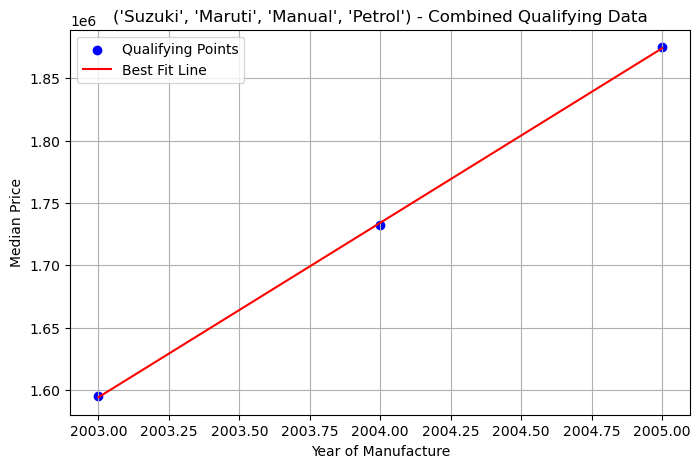

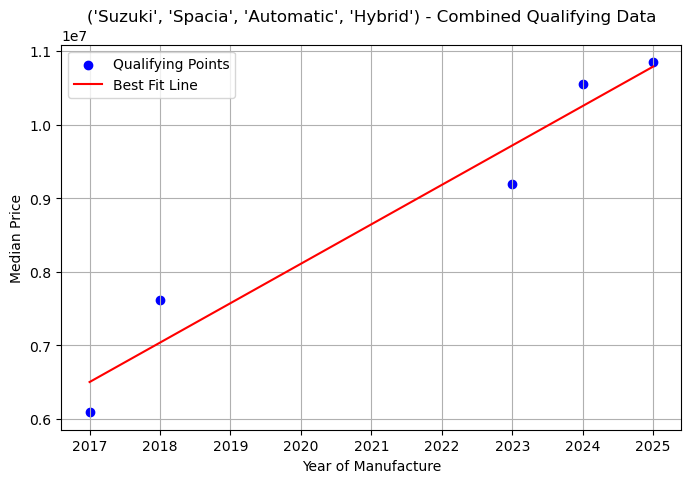

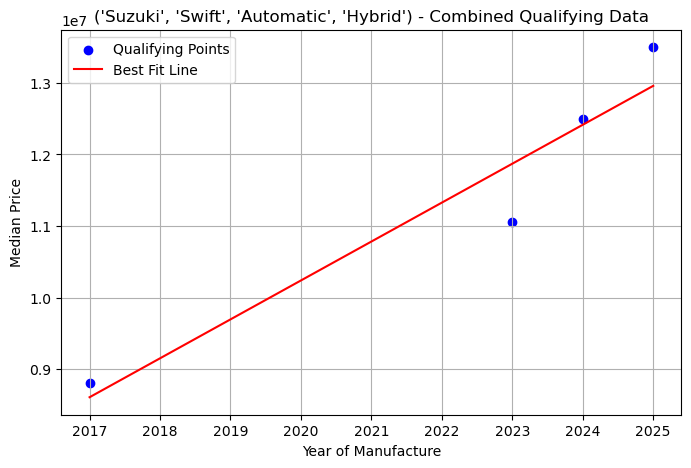

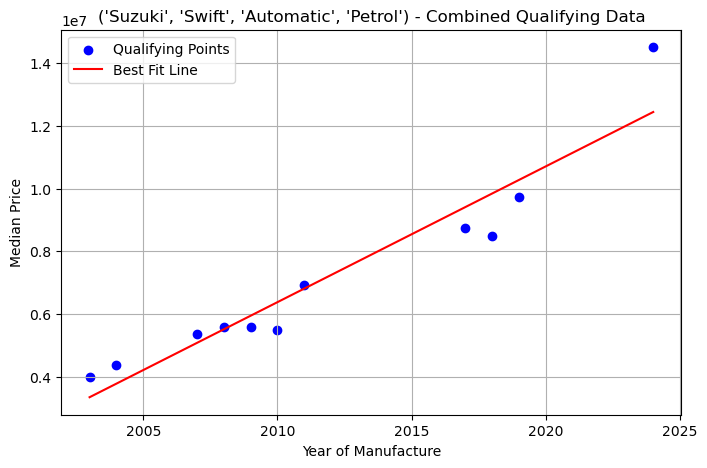

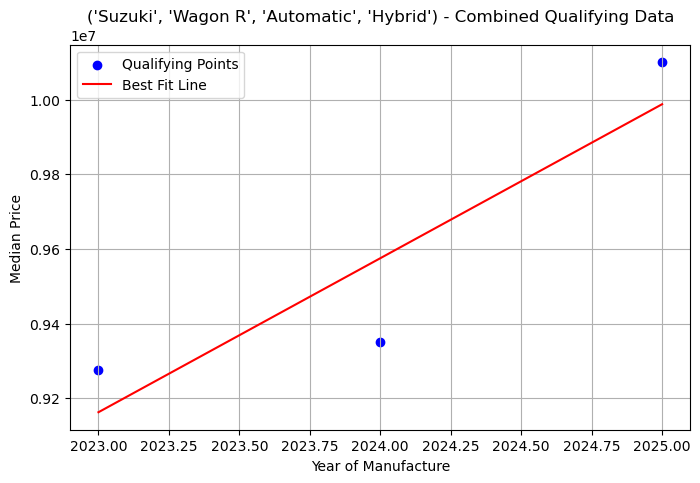

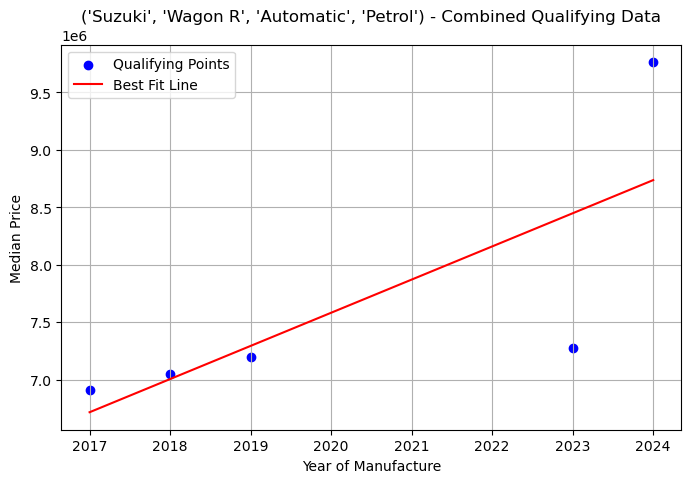

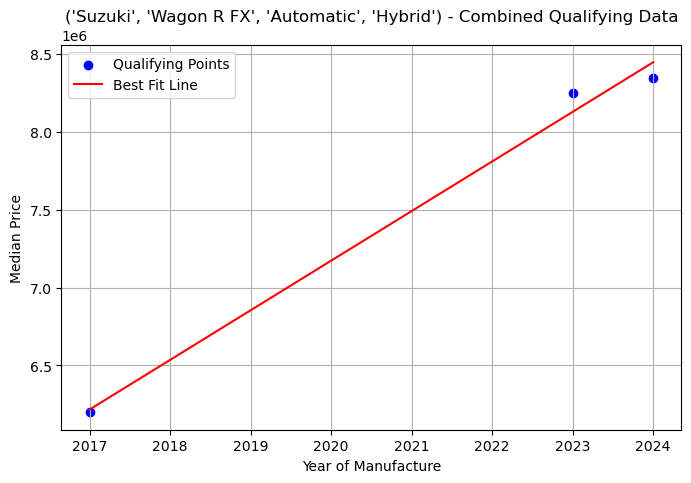

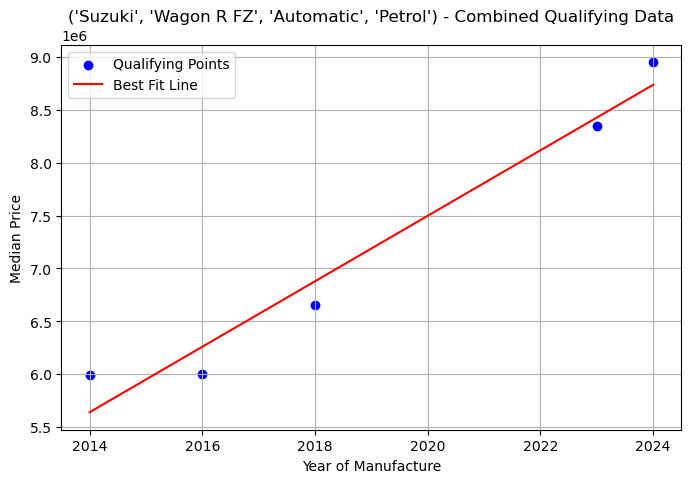

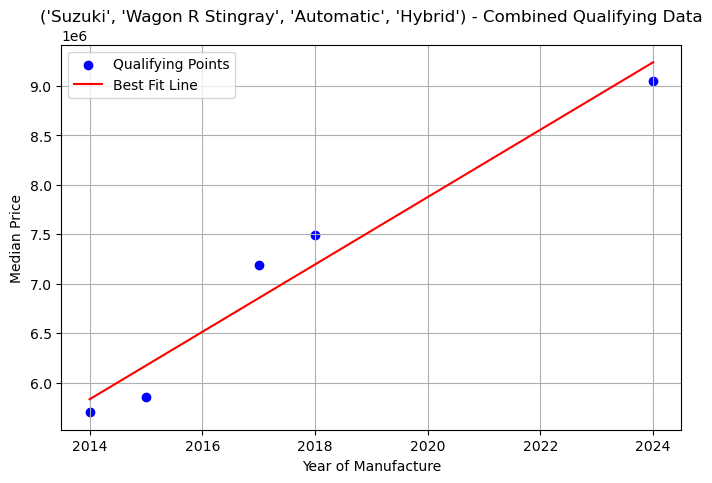

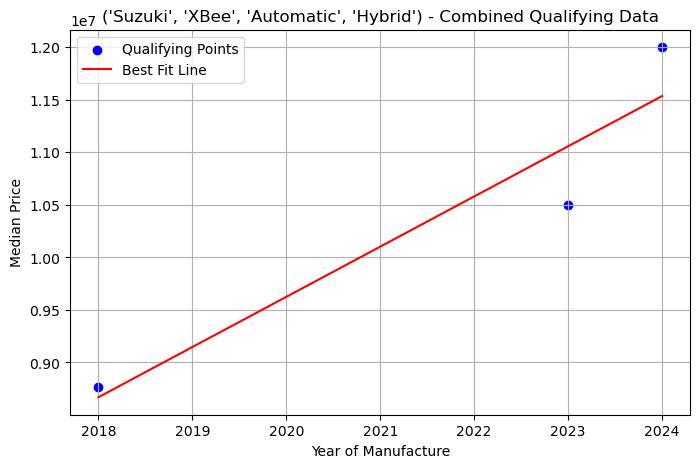

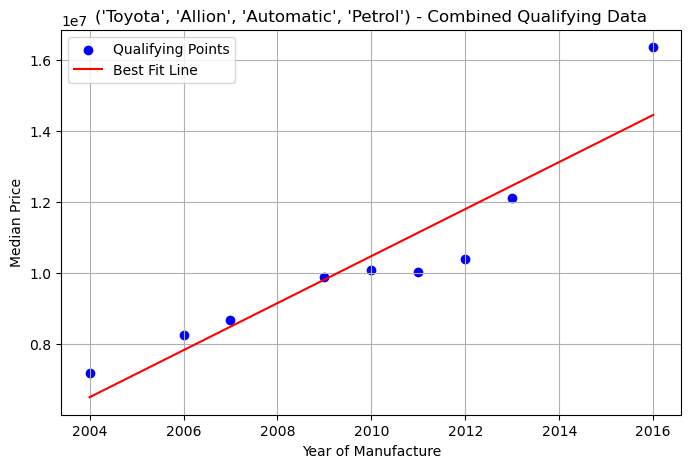

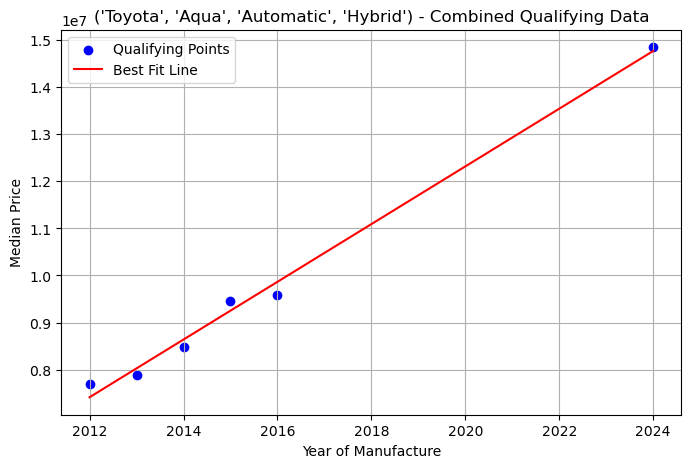

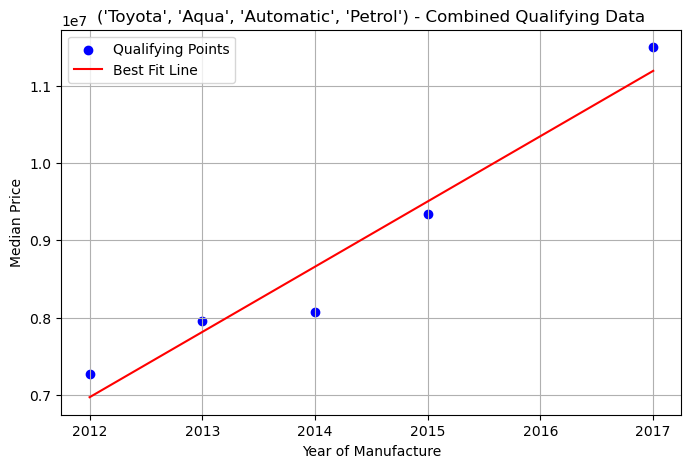

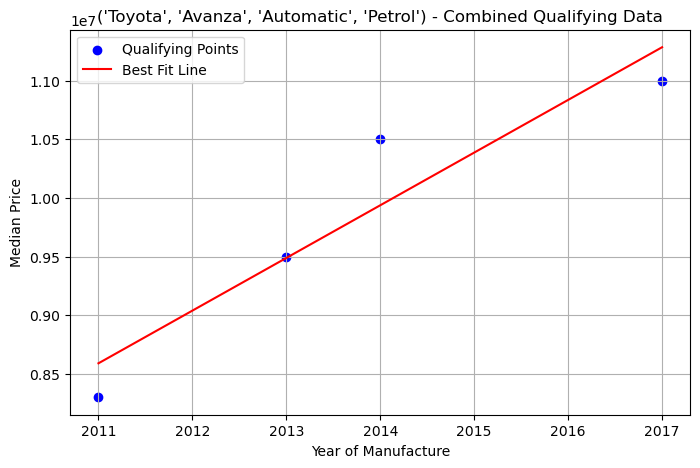

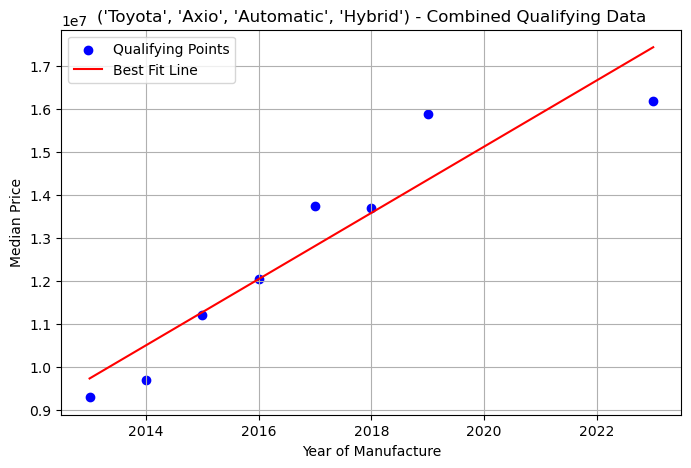

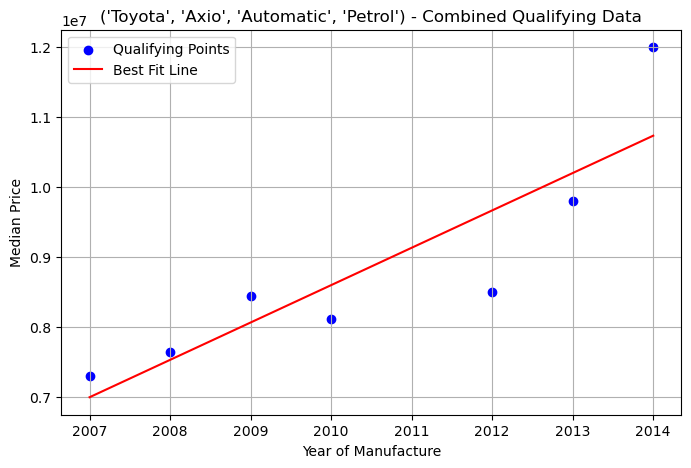

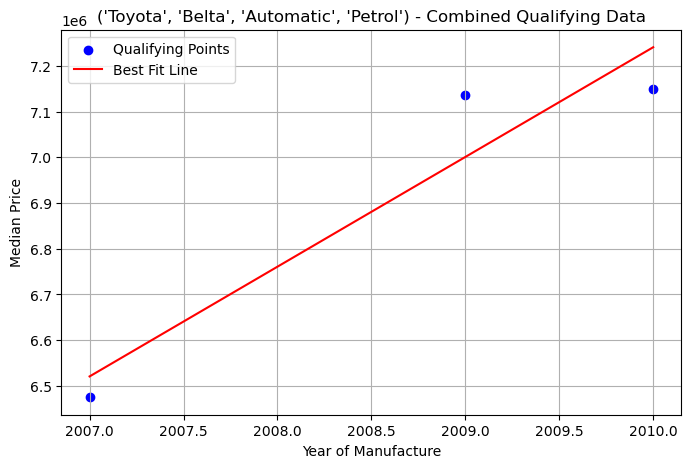

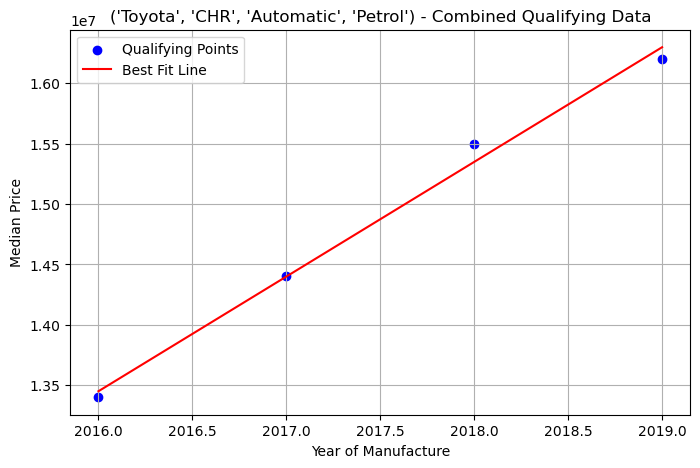

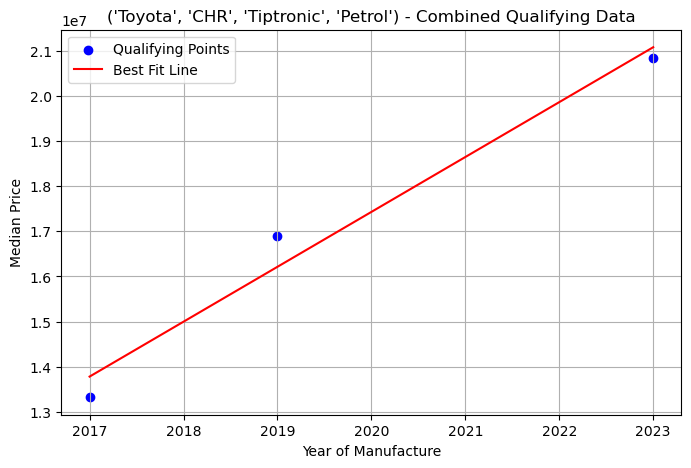

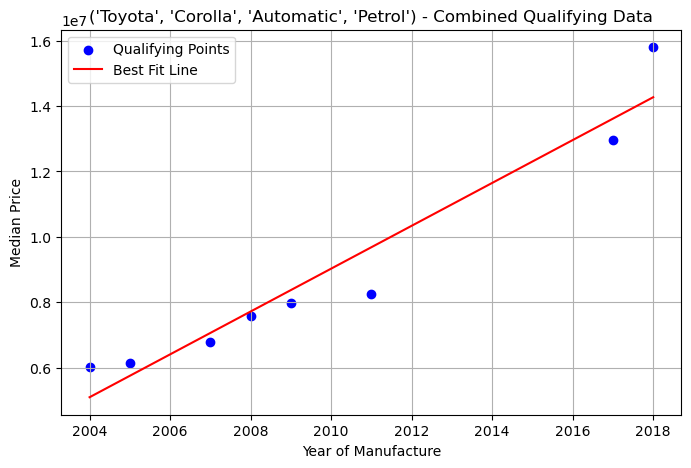

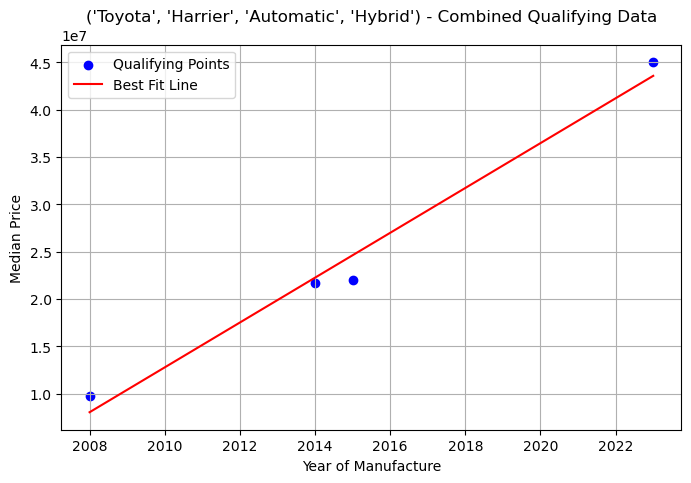

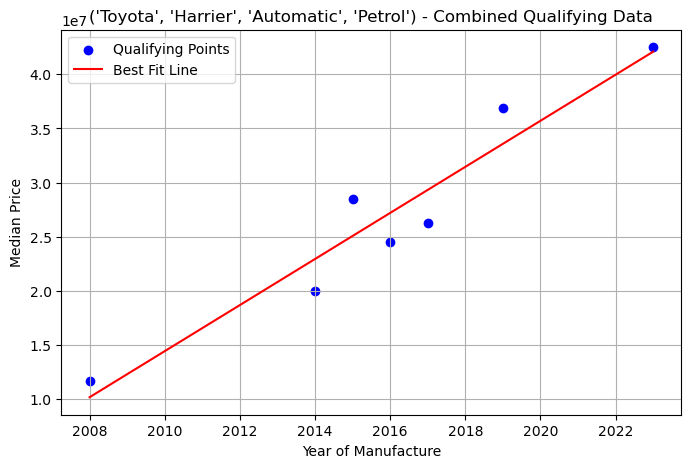

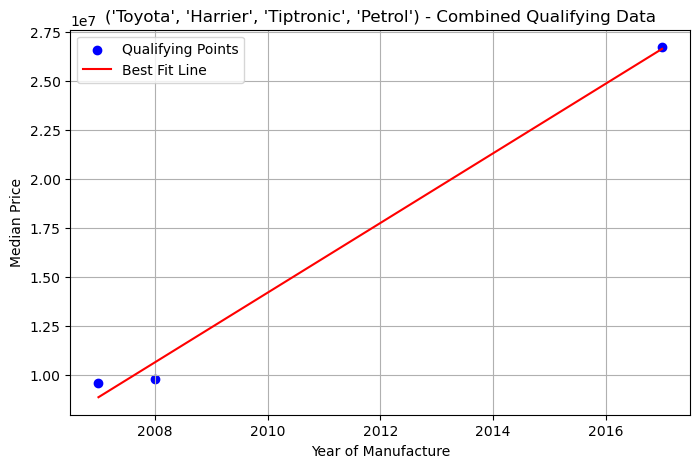

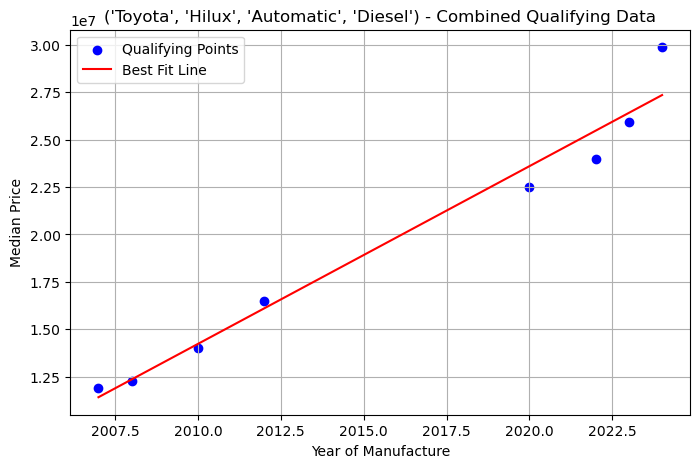

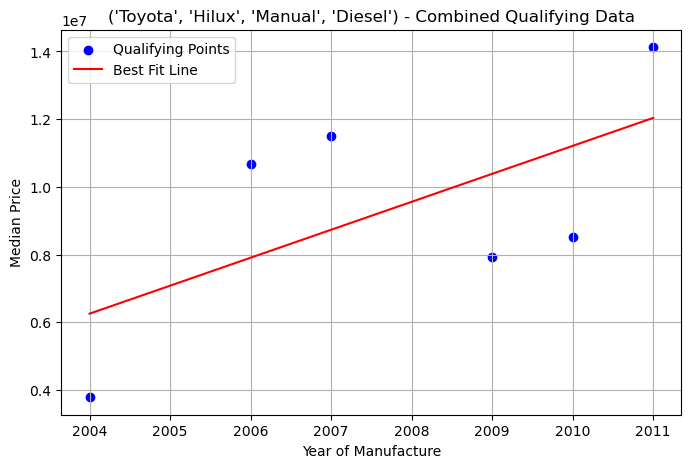

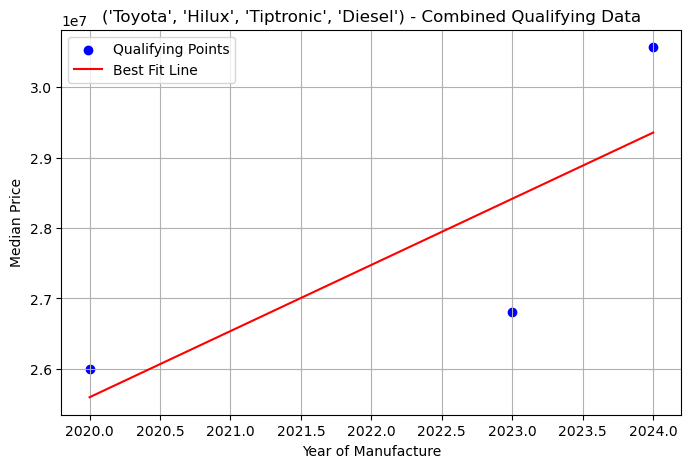

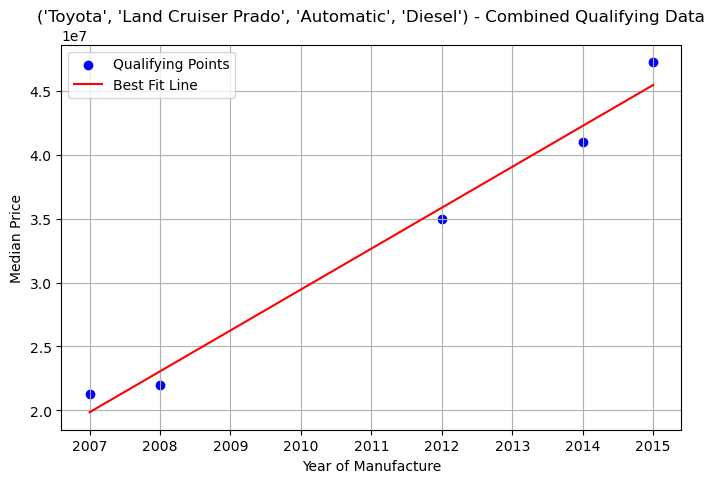

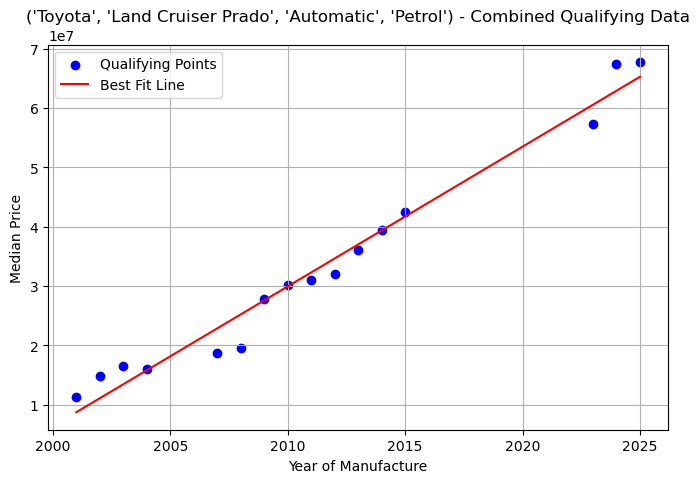

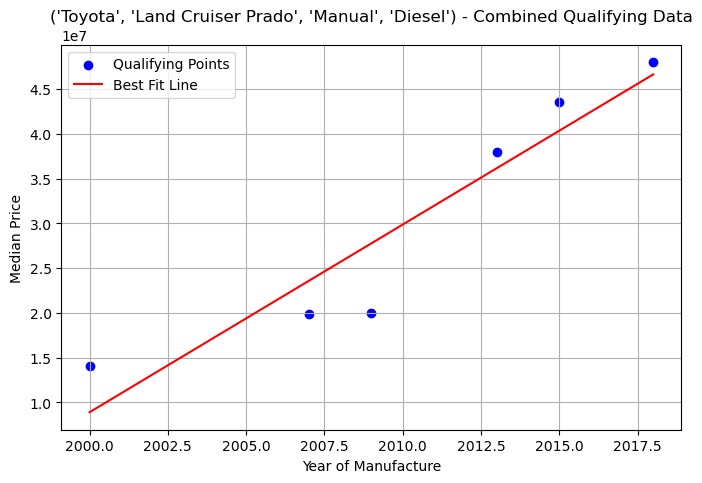

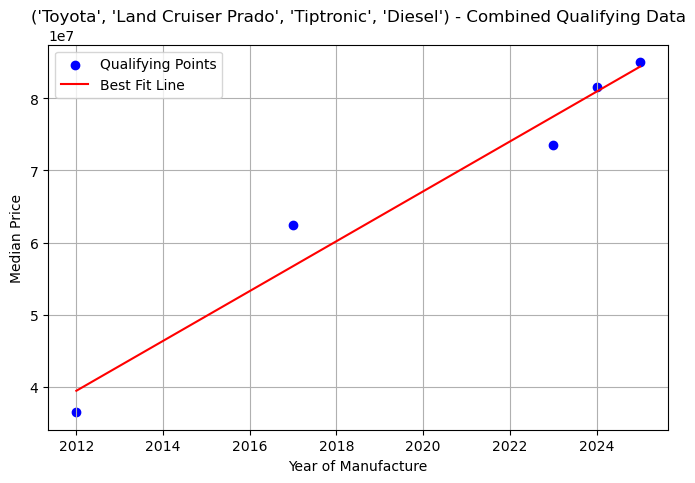

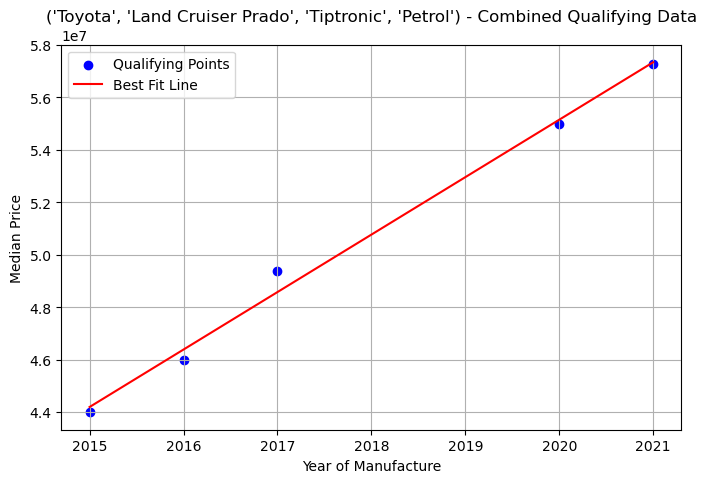

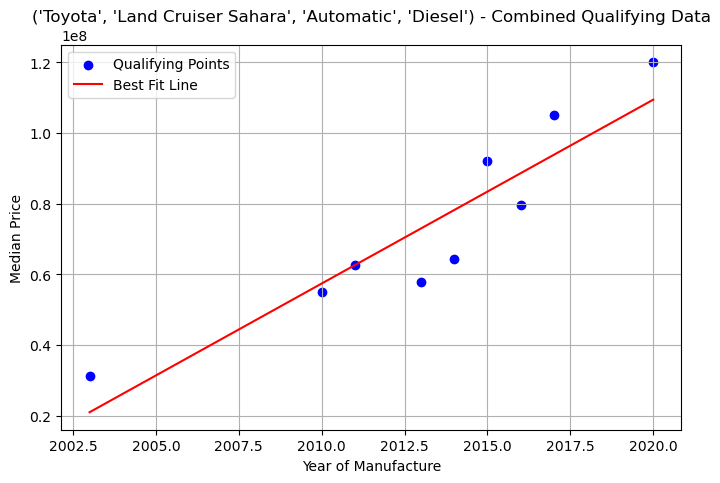

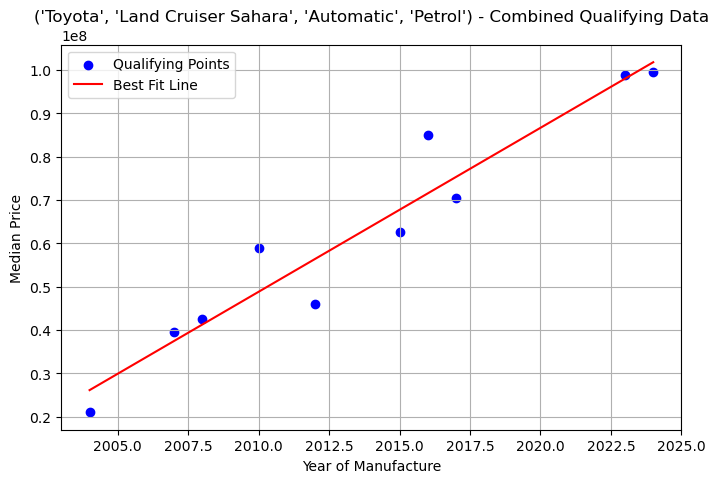

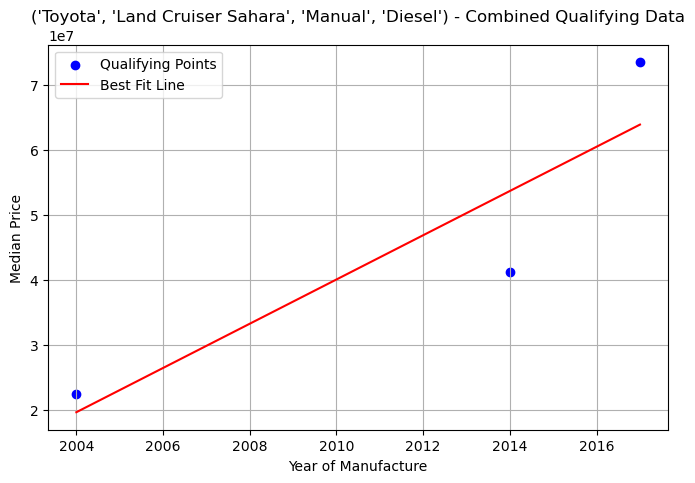

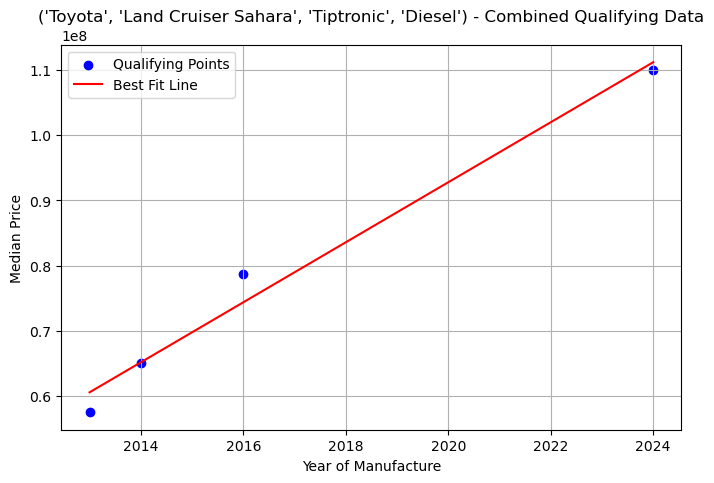

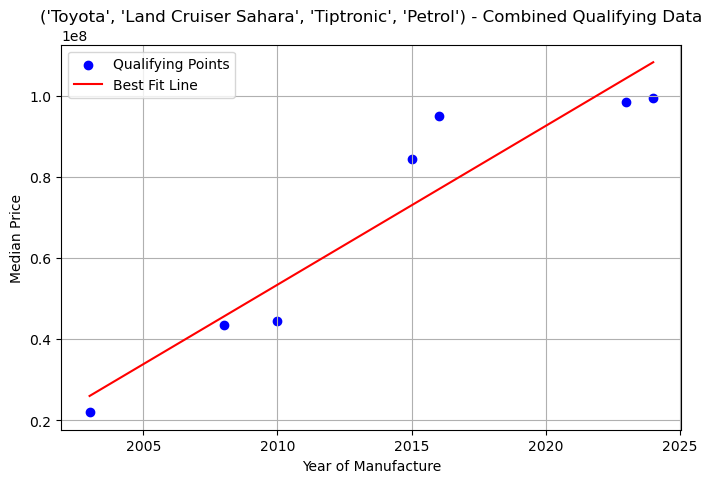

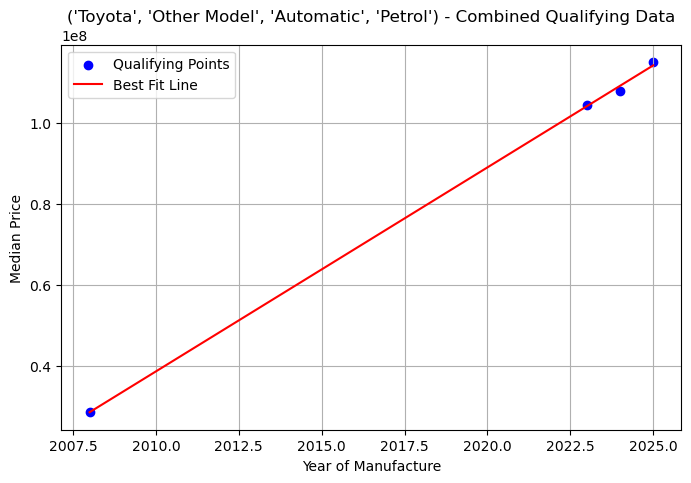

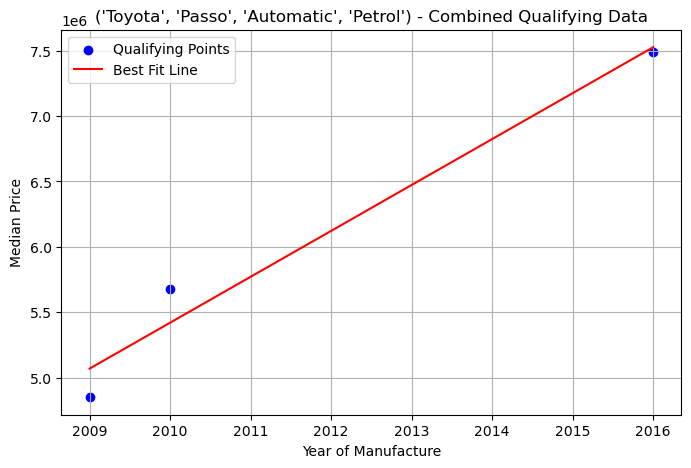

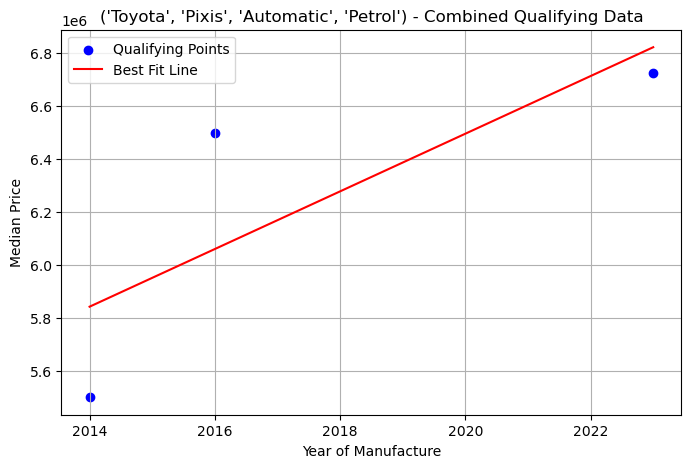

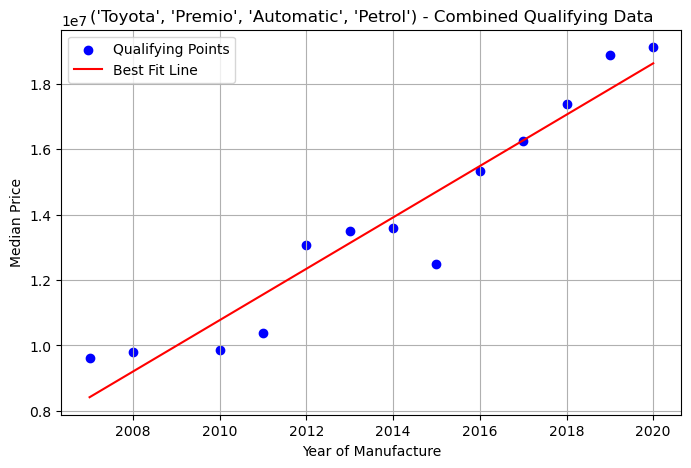

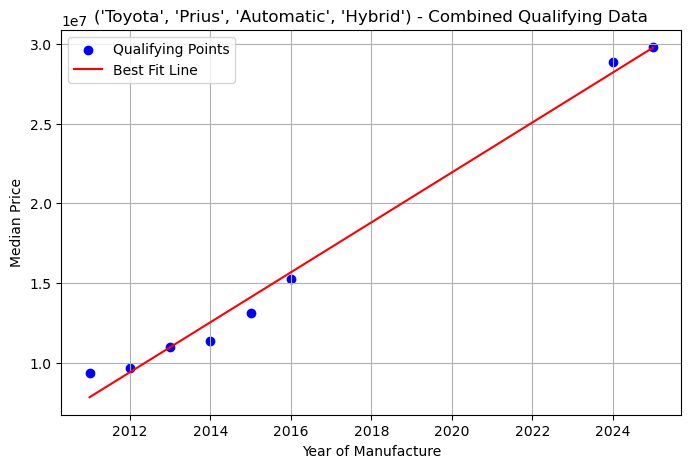

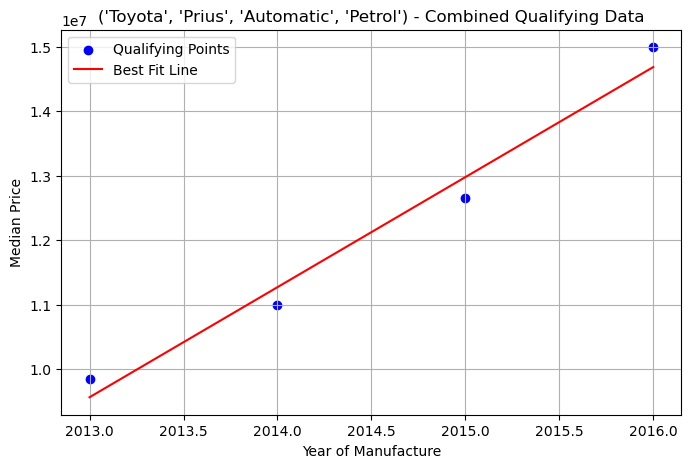

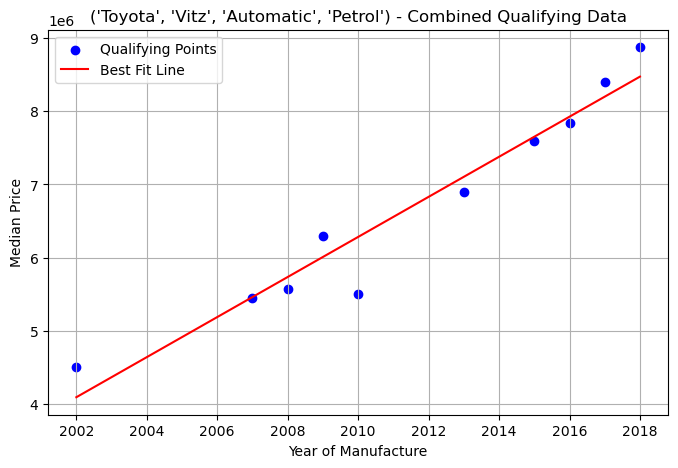

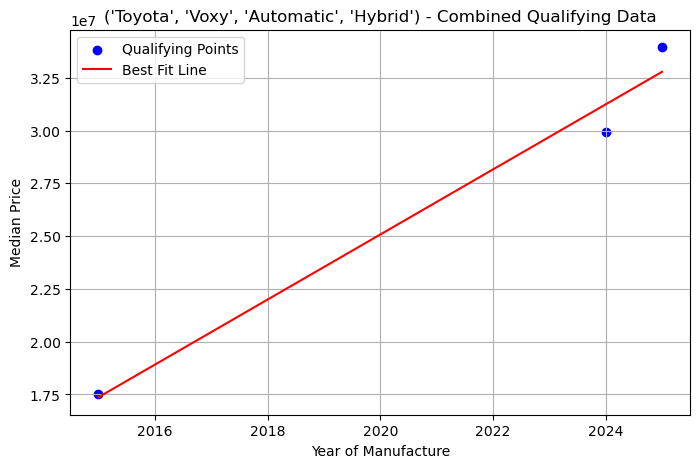

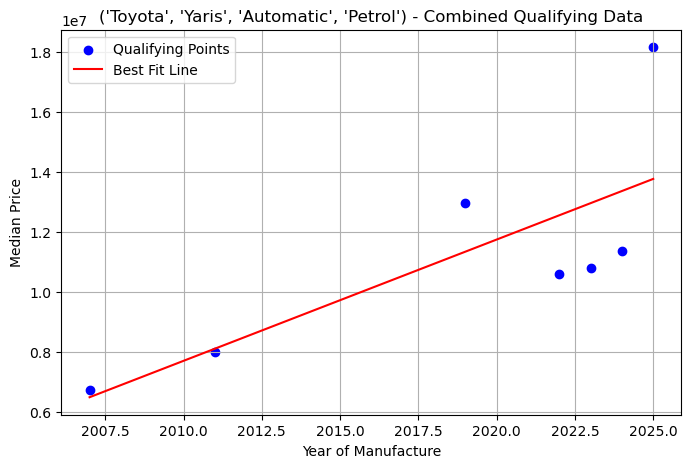

In [13]:
df_clean = master_table.dropna(subset=['Median_Price', 'Year of Manufacture'])
df_clean = df_clean.sort_values(by=['Brand', 'Model', 'Transmission', 'Fuel type', 'Year of Manufacture'])

grouped = df_clean.groupby(['Brand', 'Model', 'Transmission', 'Fuel type'])

def is_increasing(median_prices):
    return all(x < y for x, y in zip(median_prices, median_prices[1:]))

window_size = 3

for name, group in grouped:
    if len(group) < window_size:
        continue
    
    years = group['Year of Manufacture'].values.reshape(-1, 1)
    prices = group['Median_Price'].values
    
    qualifying_indices = set()
    
    # Find all indices in qualifying windows
    for start in range(len(group) - window_size + 1):
        window_prices = prices[start:start+window_size]
        if is_increasing(window_prices):
            qualifying_indices.update(range(start, start+window_size))
    
    # If fewer than 3 unique points qualify, skip plotting
    if len(qualifying_indices) < 3:
        continue
    
    # Extract qualifying points
    qualifying_years = years[list(qualifying_indices)]
    qualifying_prices = prices[list(qualifying_indices)]
    
    # Sort by year for plotting
    sorted_idx = np.argsort(qualifying_years.flatten())
    qualifying_years = qualifying_years[sorted_idx]
    qualifying_prices = qualifying_prices[sorted_idx]
    
    plt.figure(figsize=(8, 5))
    plt.scatter(qualifying_years, qualifying_prices, color='blue', label='Qualifying Points')
    
    # Fit and plot best-fit line on qualifying points
    model = LinearRegression()
    model.fit(qualifying_years, qualifying_prices)
    predicted = model.predict(qualifying_years)
    
    plt.plot(qualifying_years, predicted, color='red', label='Best Fit Line')
    
    plt.title(f'{name} - Combined Qualifying Data')
    plt.xlabel('Year of Manufacture')
    plt.ylabel('Median Price')
    plt.legend()
    plt.grid(True)
    plt.show()



In [14]:
# Copy your master table
df = master_table.copy()

# Filter valid base rows
df_fit = df.dropna(subset=['Median_Price', 'Min_Year', 'Max_Year', 'Count'])

# Define group columns
group_cols = ['Brand', 'Model', 'Transmission', 'Fuel type']
filled_rows = []

for group_key, group_data in df_fit.groupby(group_cols):
    group_data = group_data.dropna(subset=['Year of Manufacture', 'Median_Price'])
    
    if group_data.shape[0] < 3:
        continue  # Not enough data to train a model
    
    # Training data
    X = group_data[['Year of Manufacture']]
    y = group_data['Median_Price']

    # Fit Gradient Boosting Regressor
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X, y)

    # Range of years to predict within Min and Max Year
    min_year = int(group_data['Min_Year'].min())
    max_year = int(group_data['Max_Year'].max())

    actual_prices = dict(zip(group_data['Year of Manufacture'], group_data['Median_Price']))

    for year in range(min_year, max_year + 1):
        predicted_price = model.predict([[year]])[0]
        actual_price = actual_prices.get(year)

        if actual_price is not None and actual_price < predicted_price:
            final_price = actual_price
        else:
            final_price = predicted_price

        filled_rows.append({
            'Brand': group_key[0],
            'Model': group_key[1],
            'Transmission': group_key[2],
            'Fuel type': group_key[3],
            'Year of Manufacture': year,
            'Median_Price': round(final_price, 2)
        })

# Create final DataFrame
result_df = pd.DataFrame(filled_rows)
result_df = result_df.sort_values(by=['Brand', 'Model', 'Transmission', 'Fuel type', 'Year of Manufacture'])

# Optional: Save or view
result_df.to_csv("gbr_filled_prices.csv", index=False)
print(result_df)


c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packa

       Brand  Model Transmission Fuel type  Year of Manufacture  Median_Price
0        BMW   318i    Automatic    Petrol                 2008   13000000.00
1        BMW   318i    Automatic    Petrol                 2009   13000221.60
2        BMW   318i    Automatic    Petrol                 2010   13000221.60
3        BMW   318i    Automatic    Petrol                 2011   13000221.60
4        BMW   318i    Automatic    Petrol                 2012   13000221.60
...      ...    ...          ...       ...                  ...           ...
1252  Toyota  Yaris    Automatic    Petrol                 2021   10750059.18
1253  Toyota  Yaris    Automatic    Petrol                 2022   10582500.00
1254  Toyota  Yaris    Automatic    Petrol                 2023   10799982.50
1255  Toyota  Yaris    Automatic    Petrol                 2024   11369895.50
1256  Toyota  Yaris    Automatic    Petrol                 2025   18149627.36

[1257 rows x 6 columns]


c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\Pamith\anaconda3\Lib\site-packa

In [15]:
result_df

Brand  Model Transmission Fuel type  Year of Manufacture  Median_Price
0        BMW   318i    Automatic    Petrol                 2008   13000000.00
1        BMW   318i    Automatic    Petrol                 2009   13000221.60
2        BMW   318i    Automatic    Petrol                 2010   13000221.60
3        BMW   318i    Automatic    Petrol                 2011   13000221.60
4        BMW   318i    Automatic    Petrol                 2012   13000221.60
...      ...    ...          ...       ...                  ...           ...
1252  Toyota  Yaris    Automatic    Petrol                 2021   10750059.18
1253  Toyota  Yaris    Automatic    Petrol                 2022   10582500.00
1254  Toyota  Yaris    Automatic    Petrol                 2023   10799982.50
1255  Toyota  Yaris    Automatic    Petrol                 2024   11369895.50
1256  Toyota  Yaris    Automatic    Petrol                 2025   18149627.36

[1257 rows x 6 columns]

result_df